In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
venezuela_users = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_users_csv_hashed.csv')


In [5]:
venezuela_users.head(100)

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,778257194076831744,AmericaForTrump🇺🇸,America4Trump_,"Washington, DC",President Trump is a warrior giving a voice to...,https://t.co/XLyfrLF834,13184,10245,2016-09-20,es
1,UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=,UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=,UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=,"Washington, DC",Breaking News as it happens on everything Dona...,https://t.co/ZkpEZdjz6R,3716,4690,2017-02-05,es
2,801485278858854401,Evelyn Reporter👩🏻‍💻,EvelynWhiteGOP,NaN,"Reporter👩🏻‍💻,Animal lover🐶, 100% Support @real...",https://t.co/vC8RybJYHo,61537,57791,2016-11-23,es
3,881675624401833984,TRUMP TRAIN🚂💨,DTrumpTrain_,NaN,The voice of the Twitter community for Donald ...,https://t.co/vC8RybJYHo,47083,43254,2017-07-03,es
4,768237282562310144,#TrumpNews 🇺🇸,GODBLESSAMERIC,"Washington, DC",Daily political news. #TrumpPence16 #GodBlessA...,https://t.co/XLyfrLF834,15246,11249,2016-08-24,es
5,801200139155214336,TrumpservativeNews 🇺🇸,TrumpNewsz,NaN,Support and News for @realDonaldTrump 45th Pre...,https://t.co/vC8RybJYHo,64717,58804,2016-11-22,es
6,828668571765133317,TRUMP TRAIN 🚂,TRUMPTRAIN_17,"Texas, USA",Lets help @realDonaldTrump Make America Great ...,https://t.co/ZkpEZdjz6R,5059,4718,2017-02-06,es
7,801555575687495681,▶ Trump Daily News 📰,TrumpDailyNewss,NaN,Get ready for All Trump All Day and all Night....,https://t.co/vC8RybJYHo,57618,52827,2016-11-23,es
8,944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=,944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=,944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=,"Caracas, Venezuela","21│Farmacéutico en formación, UCV. ...",http://t.co/oF3sm1zp5s,1357,224,2012-04-25,es
9,896121971989262336,Emma🌺| Reporter👩‍💻,EmmaTurnerBN,NaN,YUGE Trump Supporter since the day Trump annou...,https://t.co/vC8RybJYHo,34770,32618,2017-08-11,es


In [6]:
venezuela_users.user_screen_name.nunique()

33

In [7]:
venezuela_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
userid                      33 non-null object
user_display_name           33 non-null object
user_screen_name            33 non-null object
user_reported_location      18 non-null object
user_profile_description    31 non-null object
user_profile_url            25 non-null object
follower_count              33 non-null int64
following_count             33 non-null int64
account_creation_date       33 non-null object
account_language            33 non-null object
dtypes: int64(2), object(8)
memory usage: 2.7+ KB


In [8]:
venezuela_users.follower_count.sort_values()

29        0
24      146
8      1357
23     1561
1      3716
27     4045
19     4848
6      5059
21     5589
32     7366
10     8895
16     9032
13     9828
20     9980
28    10669
0     13184
15    14036
4     15246
31    17055
18    19806
26    19865
30    20176
22    20661
12    23494
14    24198
9     34770
17    40710
25    44020
3     47083
11    54778
7     57618
2     61537
5     64717
Name: follower_count, dtype: int64

In [9]:
venezuela_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [11]:
venezuela_users.user_display_name.values

array(['AmericaForTrump🇺🇸', 'UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=',
       'Evelyn Reporter👩🏻\u200d💻', 'TRUMP TRAIN🚂💨', '#TrumpNews 🇺🇸',
       'TrumpservativeNews 🇺🇸', 'TRUMP TRAIN 🚂', '▶ Trump Daily News 📰',
       '944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=',
       'Emma🌺| Reporter👩\u200d💻', 'TRUMP MEDIA NEWS⏺',
       '▶ TRUMP NEWS DAILY', 'Caroline Walker 🌸', 'Olivia Allen🚂',
       'Aria Wilson🚂', 'Samantha Clark💕', 'Breaking News🔥',
       'Lauren4Trump🍒', 'Sophia Evans💗🌴',
       'MUqZv6hxFW92V7lxJyf35c8BU8esdxS6IoV1QGiwwtQ=', 'Anna🇲 🇦 🇬 🇦 🇺🇸',
       'Sophia Miller 💙', 'TRUMPTRAIN🚂FakeNews',
       'TDgi60XrT+ylS+rVJEMhb4Y2qzW2HnZmlijAyHNqavc=',
       '55DeTN4VJIeKfM9Atr0sSTLomZbJyUWuBNdDK2an1nE=',
       'Noticias Viral TV', 'Lauren Jones 🇺🇸',
       'EAMY+7SRc0r53i1vfKV4UvVAc+DAI4rtEpUjFSbwbQ=', '🌹Alyssa Nelson🐸',
       'Caroline Walker', 'Abby Martin✨', 'Lauren Jones 🇺🇸',
       'Citizens For Trump🌎'], dtype=object)

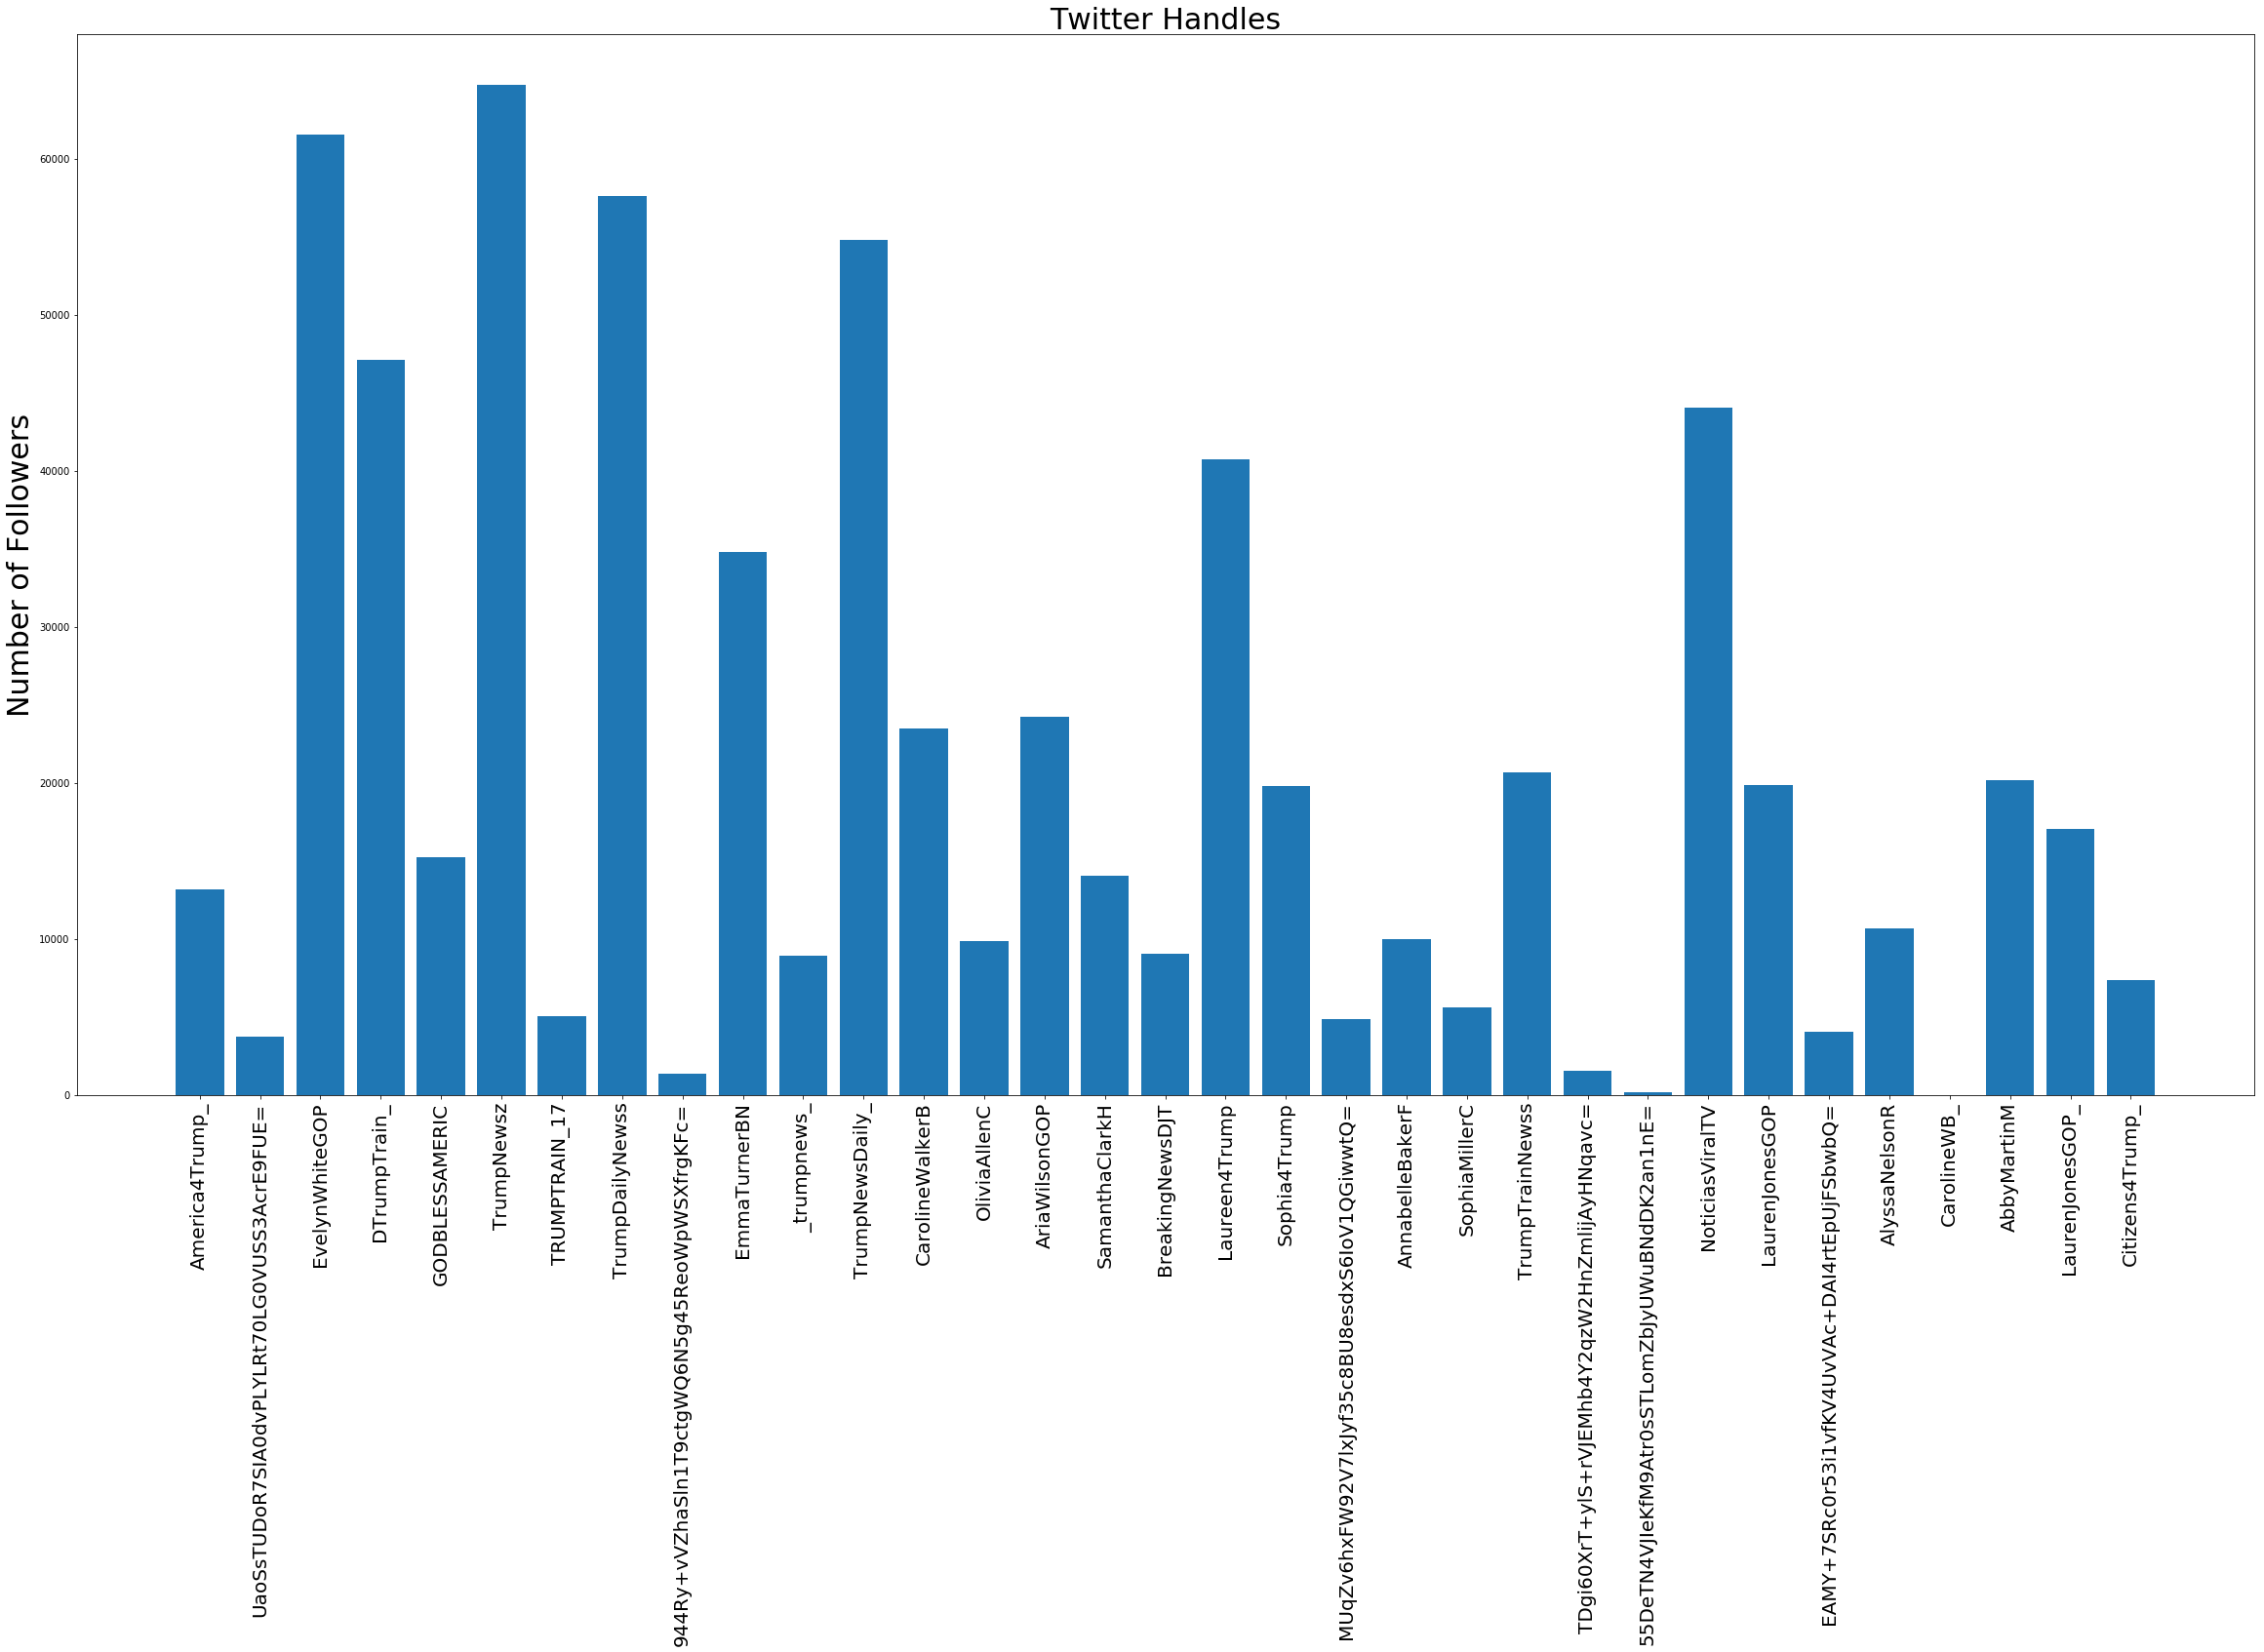

In [15]:
plt.figure(figsize=(40, 20))
ax = plt.subplot()
plt.bar(range(len(venezuela_users)),
        venezuela_users.follower_count)
ax.set_xticks(range(len(venezuela_users.user_screen_name)))
ax.set_xticklabels(venezuela_users.user_screen_name.values,rotation=90,size=20)
plt.ylabel('Number of Followers',size=30)
plt.title('Twitter Handles',size=30)
plt.show()

In [9]:
venezuela_users.user_display_name.values

array(['AmericaForTrump🇺🇸', 'UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=',
       'Evelyn Reporter👩🏻\u200d💻', 'TRUMP TRAIN🚂💨', '#TrumpNews 🇺🇸',
       'TrumpservativeNews 🇺🇸', 'TRUMP TRAIN 🚂', '▶ Trump Daily News 📰',
       '944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=',
       'Emma🌺| Reporter👩\u200d💻', 'TRUMP MEDIA NEWS⏺',
       '▶ TRUMP NEWS DAILY', 'Caroline Walker 🌸', 'Olivia Allen🚂',
       'Aria Wilson🚂', 'Samantha Clark💕', 'Breaking News🔥',
       'Lauren4Trump🍒', 'Sophia Evans💗🌴',
       'MUqZv6hxFW92V7lxJyf35c8BU8esdxS6IoV1QGiwwtQ=', 'Anna🇲 🇦 🇬 🇦 🇺🇸',
       'Sophia Miller 💙', 'TRUMPTRAIN🚂FakeNews',
       'TDgi60XrT+ylS+rVJEMhb4Y2qzW2HnZmlijAyHNqavc=',
       '55DeTN4VJIeKfM9Atr0sSTLomZbJyUWuBNdDK2an1nE=',
       'Noticias Viral TV', 'Lauren Jones 🇺🇸',
       'EAMY+7SRc0r53i1vfKV4UvVAc+DAI4rtEpUjFSbwbQ=', '🌹Alyssa Nelson🐸',
       'Caroline Walker', 'Abby Martin✨', 'Lauren Jones 🇺🇸',
       'Citizens For Trump🌎'], dtype=object)

# Look at all keywords. sort based on frequency, put it together, bag of words, highest frequency. for each tweet remove stop keyword. plot words that arent stop or keyword. find emoji, if you can label emoji. Try to change everything to scatterplot, barchart, histogram, etc. 


In [13]:
user_location = venezuela_users.groupby('user_reported_location').count()['userid']

In [14]:
user_location

user_reported_location
Caracas, Venezuela    1
Florida, USA          2
New York, NY          1
Nueva York, USA       5
Texas, USA            4
Washington, DC        5
Name: userid, dtype: int64

In [16]:
loc_df = venezuela_users[['userid','user_reported_location']]


In [17]:
loc_df

,userid,user_reported_location
0,778257194076831744,"Washington, DC"
1,UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=,"Washington, DC"
2,801485278858854401,NaN
3,881675624401833984,NaN
4,768237282562310144,"Washington, DC"
5,801200139155214336,NaN
6,828668571765133317,"Texas, USA"
7,801555575687495681,NaN
8,944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=,"Caracas, Venezuela"
9,896121971989262336,NaN


In [20]:
user_location = loc_df.groupby('user_reported_location').count()['userid']
user_location

user_reported_location
Caracas, Venezuela    1
Florida, USA          2
New York, NY          1
Nueva York, USA       5
Texas, USA            4
Washington, DC        5
Name: userid, dtype: int64

In [22]:
venezuela_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

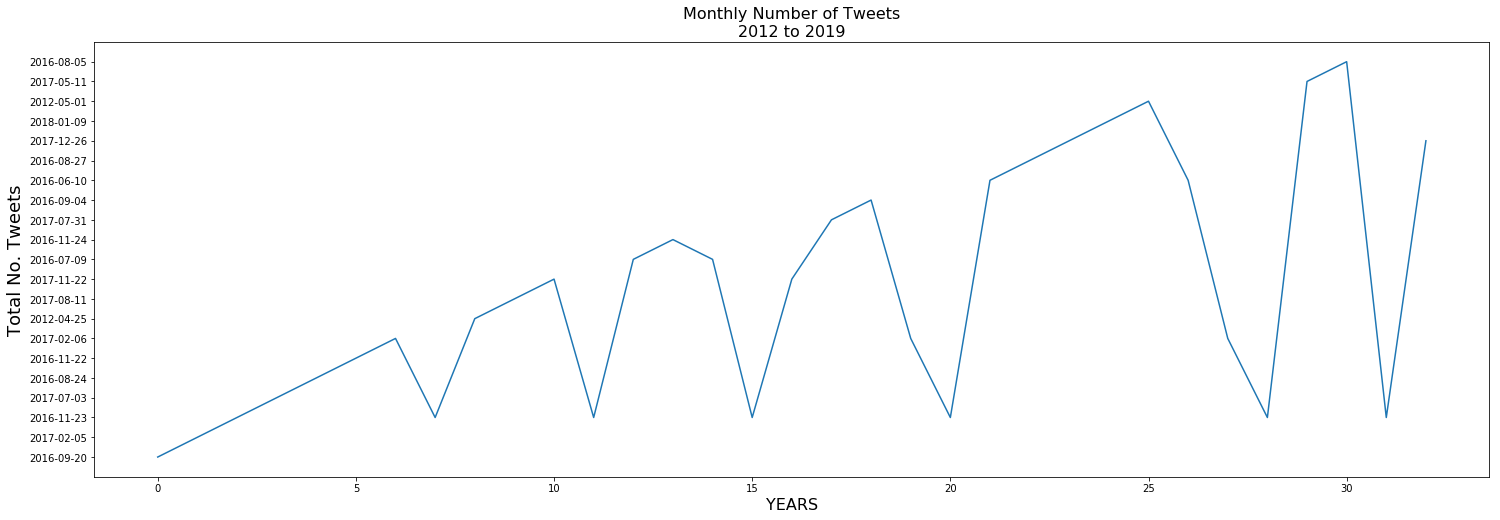

In [16]:
plt.figure(figsize=(25,8))
plt.plot(venezuela_users.account_creation_date)
plt.xlabel('YEARS', fontsize = 16)
plt.ylabel('Total No. Tweets', fontsize = 18)
plt.title('Monthly Number of Tweets\n2012 to 2019', fontsize = 16);